In [ ]:
#exemplo de classificação usando machine learning

pig1= [0, 1, 0]
pig2= [0, 1, 1]
pig3= [1, 1, 0]


cao1= [0, 1, 0]
cao2= [0, 1, 1]
cao3= [1, 1, 1]

x_train = [pig1, pig2, pig3, cao1,cao2,cao3] #dados features
y_train = [1,1,1,0,0,0] #classes labels



In [ ]:
#como estimar qual é cão e porco?
from sklearn.svm import LinearSVC
SEED=20
model = LinearSVC(random_state=SEED)
model.fit(x_train, y_train)

LinearSVC(random_state=20)

In [ ]:
animal_misterioso = [1,1,1]
pred_animal_misterioso = model.predict([animal_misterioso])
if pred_animal_misterioso==0:
  print('É um cachorro')
else:
  print('É um porco')

É um cachorro


In [ ]:
animal_misterioso1 = [1,1,1]
animal_misterioso2 = [1,1,0]
animal_misterioso3 = [0,1,1]
x_test= [animal_misterioso1, animal_misterioso2, animal_misterioso3]#valores a serem classificados
y_test = [0,1,1] #valores reais

pred_animal_misterioso = model.predict(x_test)
for i in pred_animal_misterioso:
  if i==0:
    print('É um cachorro')
  else:
    print('É um porco')

É um cachorro
É um porco
É um cachorro


The correct would be dog, pig and pig. there was an error in the algorithm when classifying the mysterious animals, that is, 66% accuracy.

In [ ]:
acertos = (pred_animal_misterioso == y_test).sum()
total = len(x_test)
acc = (acertos/total*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 66.67%


Great, but sklearn already have all that code in a single function.

In [ ]:
from sklearn.metrics import accuracy_score
acc = (accuracy_score(y_test, pred_animal_misterioso)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 66.67%


# Another dataset

The uri is data related to sites, if they have a home, if they work, if they have contacts and if they are for sale. The data is arranged in a boolean array.

In [ ]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
#traduzindo o nome das features
rename_map = {
    'home': 'principal',
    'how_it_works': 'funciona?',
    'contact': 'contato',
    'bought': 'comprado'
}

dados.rename(columns=rename_map, inplace=True)

x = dados.drop('comprado', axis=1)
y = dados.comprado

For a better training set it is important to separate a portion of the data as training set.

In [ ]:
treino_x= x[:75]
treino_y= y[:75]
teste_x= x[75:]
teste_y= y[75:]
print(f'The model was trained with n={len(treino_x)} for x and tested with n={len(teste_y)} for y')

The model was trained with n=75 for x and tested with n=24 for y


In [ ]:
import numpy as np
SEED=20
np.random.seed(SEED)

model.fit(treino_x, treino_y)
pred = model.predict(teste_x)
acc = (accuracy_score(teste_y, pred)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 95.83%


If we set the seed nop numpy automatically we will set the ssed for all sklearn models.

There is also a way to separate using sklearn's own model.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

The code above performs the separation of training and testing using a sklearn model made for this purpose.

In [ ]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 96.00%


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 100.00%


Note that when using the same code, we get different acc's. This is due to the random state of the model (random_state).

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 96.00%


By defining a seed, or changing the random_state parameter to the same value, we have a test and training separation fixed in the randomness generated by the seed, or SEED=20. So we always have the same acc.

## Checking the separation

In [ ]:
y_train.value_counts()

0    47
1    27
Name: comprado, dtype: int64

In [ ]:
y_test.value_counts()

0    19
1     6
Name: comprado, dtype: int64

Note that the ratio of values 0 and 1 does not match for testing and training. this tends the training according to the classification that the 0 and 1 define. if 1 is buy, for example, in the test there are many more buyers than in the training. This tends the model to the bias that more purchases will always be made.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 96.00%


In [ ]:
y_train.value_counts()

0    49
1    25
Name: comprado, dtype: int64

In [ ]:
y_test.value_counts()

0    17
1     8
Name: comprado, dtype: int64

Now we have an equal ratio and for this dataset, there were no changes in the acc, but generally there is a positive change in having an equal ratio between test and training. Of course, strafity only applies when classes (0, or 1) have a large number of repetitions.

# New project

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


For this dataset it is possible to create some features, like the feature called finished as the oppisite of unfinished.

In [ ]:
troca={0:1, 1:0}
dados['finished'] = dados.unfinished.map(troca)
dados.head(10)

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


## Using Seaborn

<Axes: xlabel='expected_hours', ylabel='price'>

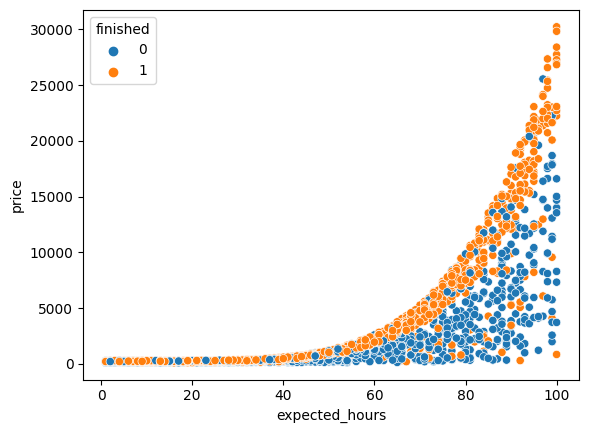

In [ ]:
import seaborn as sns
sns.scatterplot(x='expected_hours', y='price',hue='finished', data=dados)

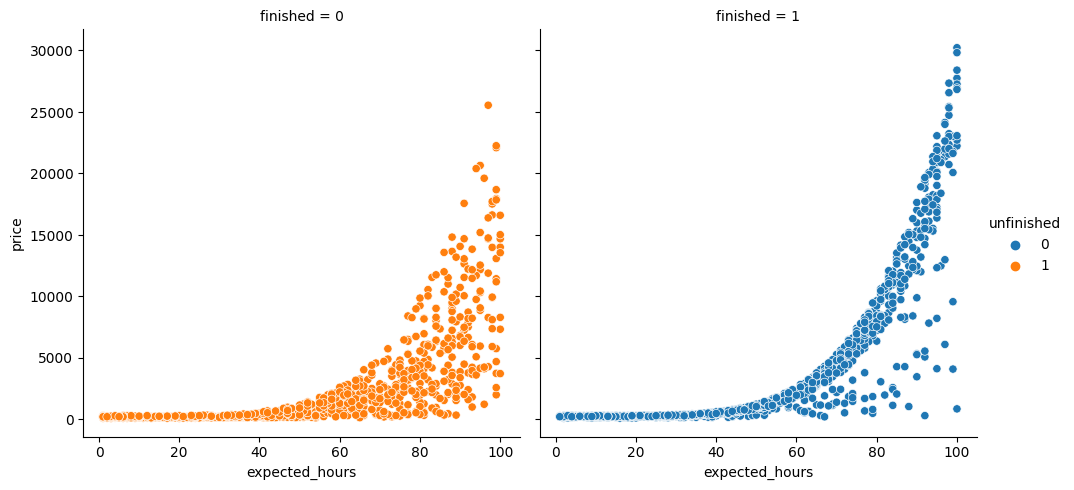

In [ ]:
sns.relplot(x='expected_hours', y='price',col='finished', hue='unfinished', data=dados)

Visually, it seens that some value/hour of the projects were not ended.

In [ ]:
x=dados[['expected_hours',	'price']]
y=dados['finished']
model = LinearSVC()

x_train, x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=1617 for x and tested with n=540
The Accuracy is 52.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acc is not that high, but that doesn't mean the model is bad. We have to compare it with another one to verify if the current acc is indeed "bad".

In [ ]:
import numpy as np
my_pred = np.ones(540)
acc = (accuracy_score(y_test, my_pred)*100)
print('The accuracy is %.2f' % acc + '%')

The accuracy is 52.59%


The baseline forecast considering only class 1 is close to the algorithm's forecast. With this, we can infer that the model is not suitable, or is bad for these data.

## Improving the model

In [ ]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


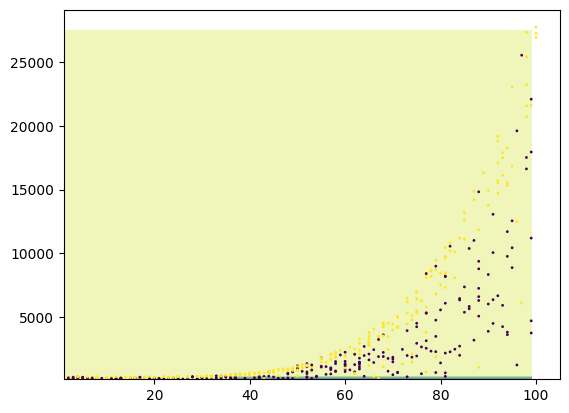

In [ ]:
pixel = 100
x_ax =np.arange(x_min, x_max, (x_max-x_min)/pixel)
y_ax =np.arange(y_min, y_max, (y_max-y_min)/pixel)
xx, yy = np.meshgrid(x_ax, y_ax)
dots = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(dots)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(x_test.expected_hours, x_test.price, c=y_test, s=1)

The line that defines the separation of classes 0 and 1 is very poorly positioned and consequently does not explain the difference between classes. A straight line would not separate the data in this dataset.

## Testing Support vector classification (SVC)

In [ ]:
from sklearn.svm import SVC

x=dados[['expected_hours',	'price']]
y=dados['finished']
model = SVC()

x_train, x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=1617 for x and tested with n=540
The Accuracy is 53.15%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


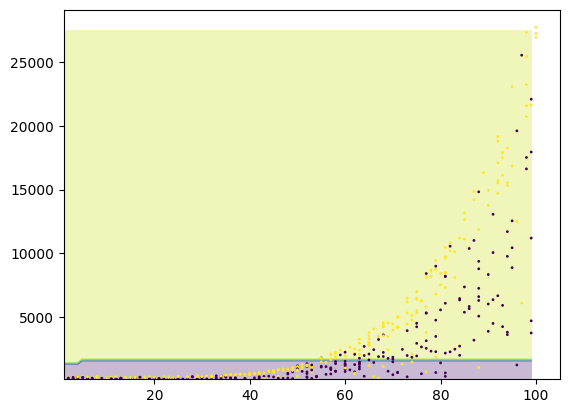

In [ ]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()

pixel = 100
x_ax =np.arange(x_min, x_max, (x_max-x_min)/pixel)
y_ax =np.arange(y_min, y_max, (y_max-y_min)/pixel)
xx, yy = np.meshgrid(x_ax, y_ax)
dots = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(dots)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(x_test.expected_hours, x_test.price, c=y_test, s=1)

Because we have high variation values and scale, the models cannot predict with acceptable accuracy. It will be necessary to perform a normalization of the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

from sklearn.svm import SVC

x=dados[['expected_hours',	'price']]
y=dados['finished']
model = SVC()

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)

scaler.fit(raw_x_train)

x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=1617 for x and tested with n=540
The Accuracy is 70.37%


The ACC has increased!

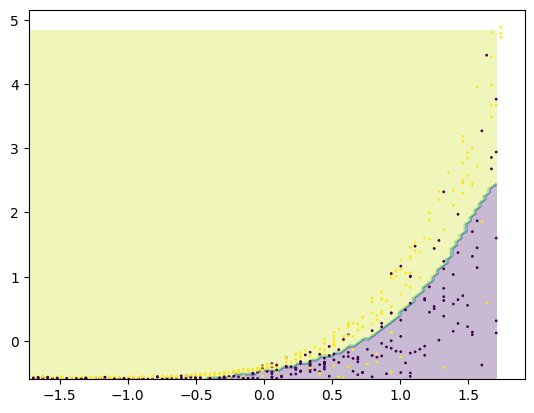

In [ ]:
data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixel = 100
x_ax =np.arange(x_min, x_max, (x_max-x_min)/pixel)
y_ax =np.arange(y_min, y_max, (y_max-y_min)/pixel)
xx, yy = np.meshgrid(x_ax, y_ax)
dots = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(dots)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

In comparison with the other plots, it is clear that one can see a separation of two distinct groups in a easier way.

## Another model for another problem

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
map = {'yes':1, 'no':0}
dados['sold']=dados['sold'].map(map)
dados['age'] = dados['model_year'].max()-dados['model_year']
dados = dados.drop(columns = ['Unnamed: 0', 'model_year'], axis=1)
dados.head()

,mileage_per_year,price,sold,age
0,21801,30941.02,1,17
1,7843,40557.96,1,19
2,7109,89627.50,0,11
3,26823,95276.14,0,2
4,7935,117384.68,1,3


In [ ]:
x =  dados[['price', 'age', 'mileage_per_year']]
y = dados['sold']

model = LinearSVC()

x_train, x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=7500 for x and tested with n=2500
The Accuracy is 62.84%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()

dummy.fit(x_train, y_train)
pred = dummy.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=7500 for x and tested with n=2500
The Accuracy is 58.00%


Now one will use a baseline from sklearn. With it, it is possible to use a dummy and calculate the ACC.

In [ ]:
acc = (dummy.score(x_test ,y_test)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=7500 for x and tested with n=2500
The Accuracy is 58.00%


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

model = SVC()

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)

scaler.fit(raw_x_train)

x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=7500 for x and tested with n=2500
The Accuracy is 75.92%


# Using decision tree

To allow one to understand the best classification decision, it is common to use decision tree classifiers. Those trees are non-black box models which allows one to see the mechanism of classification that the models execute.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
scaler.fit(x_train)

model = DecisionTreeClassifier(max_depth=3)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)
'''
scaler.fit(raw_x_train)

x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)'''#not necessary for decision tree

model.fit(raw_x_train, y_train)
pred = model.predict(raw_x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=7500 for x and tested with n=2500
The Accuracy is 78.40%


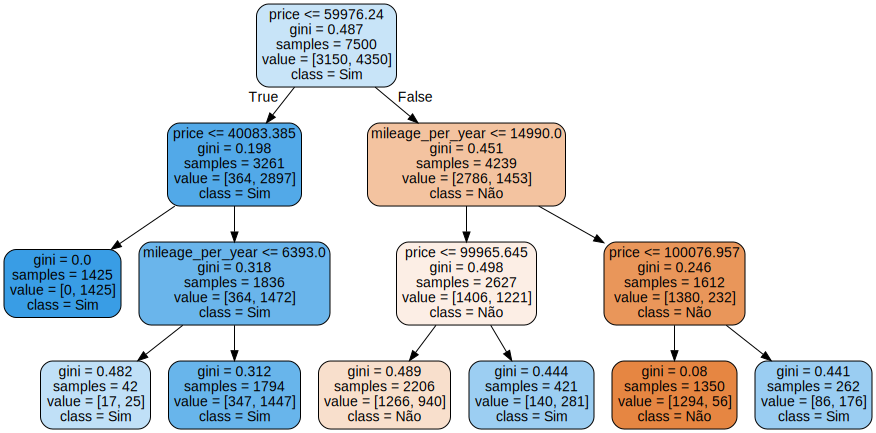

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
features=x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled=True, rounded=True,
                           feature_names = features,
                           class_names =['Não', 'Sim'] )

graph = graphviz.Source(dot_data)
graph

Based on this visualization and at the leafs of the tree (final part), 1425 cars will aleays be sold if they have price <= 40083.38 and mileage_per_year <= 6393.00. There is certain confusion about the price and mileage, since the model relates that high price and mileage will always not sell the car, but high prices with low mileage can make a car be sold.

This model requires a better approuach and validation methodology to make it better, since it only has 78% ACC.

# Making the model better

The evaluation of this model will be made, based on cars that it does not know. Also one will be using other tools from sklearn to increase the ACC and scores on cross-validation and others.

One of the limitations of the train_test_split is based on the randomness of the selection of the train and test parts, which can make ACC results vary, since "better" data could be selected as a train and compared to a "better" test sample. One could run various random test_train_splits and do cross-validation to evaluate a mean of those results, which is a good way to evaluate the model removing the bias of the randomness.

Starting with a simple validation.

In [ ]:
from sklearn.model_selection import cross_validate
model = DecisionTreeClassifier(max_depth=3)
cros_val = cross_validate(model, x, y, cv=3, return_train_score=False) #cv=3 means a triplicate of train and test separation
def results(cros_val):
  cros_val_mean = cros_val['test_score'].mean()
  cros_val_std = cros_val['test_score'].std()
  print(f'ACC mean {cros_val_mean*100:.2f}')
  print(f'ACC interval {((cros_val_mean - 2 * cros_val_std) * 100):.2f} {((cros_val_mean + 2 * cros_val_std) * 100):.2f}')
results(cros_val)

ACC mean 78.70
ACC interval 78.19 79.21


The above result means that the cross validation result will be the same for any other seed used, but doing cv=3. What if other values of cv were used?

In [ ]:
cros_val = cross_validate(model, x, y, cv=5, return_train_score=False)
results(cros_val)

ACC mean 78.69
ACC interval 77.78 79.60


In [ ]:
cros_val = cross_validate(model, x, y, cv=10, return_train_score=False)
results(cros_val)

ACC mean 78.69
ACC interval 77.15 80.23


So which cv should one use to validade the data?

based on the documentation, using cv of 5 is enough, but on some models using 10 is better. In this case, one will be using cv=5.

ACC 77.78 79.60.

Now one will validade the data, based on a random selection, sionce this cross validation was made in a deterministic way.

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
cros_val = cross_validate(model, x, y, cv=kf, return_train_score=False)
results(cros_val)

ACC mean 78.67
ACC interval 76.58 80.76


Now lets see the accs with shuffle turned to true.

In [ ]:
kf = KFold(n_splits=10, shuffle=True)
cros_val = cross_validate(model, x, y, cv=kf, return_train_score=False)
results(cros_val)

ACC mean 78.68
ACC interval 75.69 81.67


## What about the luck of the data scientist?

Sometimes one can be a victim of the rng gods. While working with certain dataset, the data points could already be sorted in certain way, or have a an invisible standard in it. The shuffle paramether of the k fold is used to avoid the luck of the data scientist odd and removes the rng gods from the code.

In [ ]:
unlucky_dados = dados.sort_values('price', ascending=True)
x_bad =  unlucky_dados[['price', 'age', 'mileage_per_year']]
y_bad = unlucky_dados['sold']

In [ ]:
#without shuffle
kf = KFold(n_splits=10)
cros_val = cross_validate(model, x_bad, y_bad, cv=kf, return_train_score=False)
results(cros_val)

ACC mean 75.08
ACC interval 42.20 107.96


In [ ]:
#with shuffle
kf = KFold(n_splits=10, shuffle=True)
cros_val = cross_validate(model, x_bad, y_bad, cv=kf, return_train_score=False)
results(cros_val)

ACC mean 78.69
ACC interval 77.21 80.17


As one can see, the ACC changed drastically with the shuffle parameter being used.

The k fold could also be stratified, making  a better validation of the model.

In [ ]:
from sklearn.model_selection import StratifiedKFold
SEED=20
np.random.seed(SEED)

skf = StratifiedKFold(n_splits=10, shuffle=True)
cros_val = cross_validate(model, x_bad, y_bad, cv=skf, return_train_score=False)
results(cros_val)

ACC mean 78.67
ACC interval 76.54 80.80


Always do your research to evaluate which validator is the best for your data. Also, think about the parameters that are better for the validator and the dataset that you are working on. The model that one can use, can also be compared. Some models behave better and have higher acc than other models.

## Model comparation

Now the algorithn will be evaluated regarding the new cars. If the algorithn is good it can evaluate every new car, but the algorithn can't evaluate cars by that car's model, since it does not know what car model is associated with the features of the dataset. It is necessary to create an association with the data set, for each new car.

In [ ]:
dados

,mileage_per_year,price,sold,age
0,21801,30941.02,1,17
1,7843,40557.96,1,19
2,7109,89627.50,0,11
3,26823,95276.14,0,2
4,7935,117384.68,1,3
...,...,...,...,...
9995,15572,97112.86,0,11
9996,13246,107424.63,1,15
9997,13018,93856.99,0,3
9998,10464,51250.57,1,6


In [ ]:
SEED=20
np.random.seed(SEED)

dados['rng_car_model'] = dados.age + np.random.randint(-2,3, size=len(dados))
dados.head(5)

,mileage_per_year,price,sold,age,rng_car_model
0,21801,30941.02,1,17,18
1,7843,40557.96,1,19,19
2,7109,89627.50,0,11,13
3,26823,95276.14,0,2,2
4,7935,117384.68,1,3,2


In [ ]:
dados.rng_car_model.unique()

array([18, 19, 13,  2, 12, 16,  9,  1, 11, 10,  6,  3,  4, 15,  5, 14, 20,
        7, 17,  8, 21,  0, -1, -2])

Since it makes no sense a car model being -1 and -2 a small treatment will be done.

In [ ]:
dados.rng_car_model = dados.rng_car_model + abs(dados.rng_car_model.min()) + 1
dados.rng_car_model.unique()

array([21, 22, 16,  5, 15, 19, 12,  4, 14, 13,  9,  6,  7, 18,  8, 17, 23,
       10, 20, 11, 24,  3,  2,  1])

For the validation of this model, it is needed to be used a grouped validation.

In [ ]:
from sklearn.model_selection import GroupKFold
SEED=20
np.random.seed(SEED)

x = dados[['price', 'age', 'mileage_per_year', 'rng_car_model']]
y = dados['sold']

gkf = GroupKFold(n_splits=10)
cros_val = cross_validate(model, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)
results(cros_val)

ACC mean 78.68
ACC interval 75.39 81.97


Even adding car models, the algorithn did a good job returning an ACC almost equal to the stratified k fold.

# Evaluating each model

## SVC

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
np.random.seed(SEED)

x = dados[['price', 'age', 'mileage_per_year', 'rng_car_model']]
y = dados['sold']
model = SVC()

pipeline = Pipeline([('normalization',scaler), ('estimator', model)])

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y,
  test_size=0.25, random_state=SEED, stratify =y)

scaler.fit(raw_x_train)

x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = (accuracy_score(y_test, pred)*100)
print(f'We trained with n={len(x_train)} for x and tested with n={len(x_test)}')
print('The Accuracy is %.2f' % acc + '%')

We trained with n=7500 for x and tested with n=2500
The Accuracy is 75.84%


In [ ]:
gkf = GroupKFold(n_splits=10)
cros_val = cross_validate(model, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)
results(cros_val)

ACC mean 77.41
ACC interval 74.15 80.66


What a great result, the model SVC can almost be the same as the decision tree for the dataset used!

No, it can't.

The result above is based on the model fitting only once to the train data, but remember that cross-validation does 5 times that process. Training only once will not return a True result it can be an overstimation of the Truth, biased by a single training.

Using the pipeline defined above the model will be trained by the same number of folds used by the validation model.

In [ ]:
gkf = GroupKFold(n_splits=10)
cros_val = cross_validate(pipeline, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)
results(cros_val)

ACC mean 76.52
ACC interval 72.96 80.08


Now the true result appears, and it is not that close.

# Model optimization

Since the best model is the random decision tree, it will be used for hyperparameter optimization.

In [ ]:
np.random.seed(SEED)

def model_run(max_depth):
  model = DecisionTreeClassifier(max_depth=max_depth)
  gkf = GroupKFold(n_splits=10)
  cros_val = cross_validate(model, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)
  results(cros_val)
for i in range(1,33): #32 is the max value for max_depth hyperparameter
  print(f'Run {i}')
  model_run(i)

Run 1
ACC mean 75.78
ACC interval 71.20 80.35
Run 2
ACC mean 75.78
ACC interval 71.20 80.35
Run 3
ACC mean 78.68
ACC interval 75.39 81.97
Run 4
ACC mean 78.66
ACC interval 75.33 81.99
Run 5
ACC mean 78.60
ACC interval 75.38 81.82
Run 6
ACC mean 78.25
ACC interval 74.51 81.98
Run 7
ACC mean 77.91
ACC interval 73.76 82.06
Run 8
ACC mean 77.78
ACC interval 74.29 81.27
Run 9
ACC mean 77.32
ACC interval 74.05 80.59
Run 10
ACC mean 76.74
ACC interval 73.97 79.51
Run 11
ACC mean 76.14
ACC interval 73.27 79.01
Run 12
ACC mean 75.73
ACC interval 72.98 78.48
Run 13
ACC mean 75.41
ACC interval 72.59 78.24
Run 14
ACC mean 74.91
ACC interval 72.10 77.71
Run 15
ACC mean 74.38
ACC interval 72.05 76.71
Run 16
ACC mean 74.63
ACC interval 71.95 77.31
Run 17
ACC mean 74.22
ACC interval 72.34 76.11
Run 18
ACC mean 74.11
ACC interval 72.14 76.09
Run 19
ACC mean 73.21
ACC interval 71.23 75.18
Run 20
ACC mean 73.20
ACC interval 71.28 75.11
Run 21
ACC mean 73.08
ACC interval 70.74 75.42
Run 22
ACC mean 72.80


Until depth 2 the tree had higher acc values, after that, the acc only got worse. This is a classic example of overfitting. Using 32 max_depth, and using cross-validation based on the test data, the ACC will be worse.

A validation using the train data will increase the ACC and make it almost perfect, but this makes the model closest only to the train data. If new data is offered to this model it will be biased to mistake.

Machine learning is not a memorization, overfitting is the same as this example: "One memorizes the multiplication table from 1 to 10. When it is offered with the data of 11*12, it returns a less acurate or wrong result."

In [ ]:
#confirming the overfitting
np.random.seed(SEED)

def model_run(max_depth):
  model = DecisionTreeClassifier(max_depth=max_depth)
  gkf = GroupKFold(n_splits=10)
  cros_val = cross_validate(model, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)

  results = cross_validate(model, x, y, cv=gkf,
                           groups = dados.rng_car_model, return_train_score=True)
  train_score =results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  table = [max_depth, train_score, test_score]
  return table

table_ = [model_run(i) for i in range(1,33)]
table_ = pd.DataFrame(table_, columns=['max_depth', 'train', 'test'])
table_

,max_depth,train,test
0,1,75.791077,75.776810
1,2,75.791077,75.776810
2,3,78.753336,78.679035
3,4,78.796657,78.659055
4,5,78.947832,78.579890
5,6,79.110087,78.245793
6,7,79.453302,77.868946
7,8,79.872040,77.820158
8,9,80.377692,77.329886
9,10,81.132029,76.814082


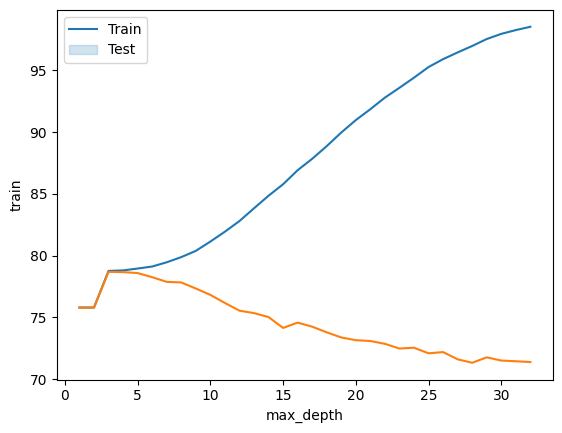

In [ ]:
sns.lineplot(x='max_depth',y='train', data=table_)
sns.lineplot(x='max_depth',y='test', data=table_)
plt.legend(['Train','Test'])

This confirms the overfitting, and shows the true behavior of the model against the test data.

In [ ]:
table_.sort_values('test', ascending=False).head(5) #top 5 best results

,max_depth,train,test
2,3,78.753336,78.679035
3,4,78.796657,78.659055
4,5,78.947832,78.579890
5,6,79.110087,78.245793
6,7,79.453302,77.868946


This process of optimization takes a long time, and the decision tree has other hyperparameters. Is there any way to optimize the parameter optimization?

## max_depth  and min_samplez_leaf optimization

In [ ]:
np.random.seed(SEED)

def model_run(max_depth, min_samples_leaf):
  model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  gkf = GroupKFold(n_splits=10)
  cros_val = cross_validate(model, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)

  results = cross_validate(model, x, y, cv=gkf,
                           groups = dados.rng_car_model, return_train_score=True)
  train_score =results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  table = [max_depth, min_samples_leaf, train_score, test_score]
  return table
def search():
  results = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32,64,128,256]: #empiracally choosing 4 min_samples_leaf
      table = model_run(max_depth,min_samples_leaf)
      results.append(table)
  results = pd.DataFrame(results, columns=['max_depth','min_samples_leaf',
                                              'train', 'test'])
  return results
results = search()
results.sort_values('test', ascending=False).head(5)

,max_depth,min_samples_leaf,train,test
9,3,64,78.751106,78.679035
11,3,256,78.751106,78.679035
15,4,256,78.751106,78.679035
14,4,128,78.751106,78.679035
13,4,64,78.751106,78.679035


Empiracally choosing 4 values for min_samples_leaf, took a very long time and returned the same result. This is not working...

Is there any relation between the hiperparameters and the test score?

In [ ]:
results.corr()

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.559841,0.026421
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.392168,0.396500
train,5.598407e-01,-3.921676e-01,1.000000,0.212525
test,2.642111e-02,3.964997e-01,0.212525,1.000000


It seens that as min_samples_leaf increases the test scores increases too.

In [ ]:
def search():
  results = []
  for max_depth in range(1,33):
    for min_samples_leaf in [192,256, 512]: #empiracally increasing the values
      table = model_run(max_depth,min_samples_leaf)
      results.append(table)
  results = pd.DataFrame(results, columns=['max_depth','min_samples_leaf',
                                              'train', 'test'])
  return results
results = search()
results.sort_values('test', ascending=False).head(5)

,max_depth,min_samples_leaf,train,test
10,4,256,78.751106,78.679035
6,3,192,78.751106,78.679035
9,4,192,78.751106,78.679035
7,3,256,78.751106,78.679035
13,5,256,78.757767,78.547987


In [ ]:
results.corr()

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.523349e-16,0.325670,0.239458
min_samples_leaf,-2.523349e-16,1.000000e+00,-0.683457,-0.437605
train,3.256696e-01,-6.834566e-01,1.000000,0.906157
test,2.394577e-01,-4.376053e-01,0.906157,1.000000


Now the result showed that the correlation between min_samples-leaf and the test is negative, still there is a number that defines the best hyperparameter, but it takes too long to find it and the scores do not change significantly. It is not worth searching for that number.

## max_depth, min_samples_leaf and min_samples_split optimization

In [ ]:
def model_run(max_depth, min_samples_leaf,min_samples_split):
  model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                 min_samples_split=min_samples_split)
  gkf = GroupKFold(n_splits=10)
  cros_val = cross_validate(model, x, y, cv=gkf, groups=dados.rng_car_model,
                          return_train_score=False)

  results = cross_validate(model, x, y, cv=gkf,
                           groups = dados.rng_car_model, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()

  train_score =results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  table = [max_depth, min_samples_leaf, min_samples_split,
           train_score, test_score, fit_time, score_time]
  return table

def search():
  results = []
  for max_depth in [1,2,3,4,5,6]: #this time less depth, since one has low number of features
    for min_samples_leaf in [192,256,512]:
      for min_samples_split in[32,64,128,256]: #empiracally increasing the values
        table = model_run(max_depth,min_samples_leaf,min_samples_split)
        results.append(table)
  results = pd.DataFrame(results, columns=['max_depth','min_samples_leaf','min_samples_split',
                                              'train', 'test','fit_time','score_time'])
  return results
results = search()
results.sort_values('test', ascending=False).head(5)

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
36,4,192,32,78.751106,78.679035,0.015208,0.002712
43,4,256,256,78.751106,78.679035,0.015606,0.003020
41,4,256,64,78.751106,78.679035,0.015819,0.003107
40,4,256,32,78.751106,78.679035,0.014992,0.002681
39,4,192,256,78.751106,78.679035,0.014518,0.002838


In [ ]:
results.corr()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
max_depth,1.000000e+00,5.082349e-16,-3.771928e-17,7.730462e-01,7.584180e-01,0.393087,0.016467
min_samples_leaf,5.082349e-16,1.000000e+00,1.277988e-17,-2.978091e-01,-2.733737e-01,-0.121422,-0.047181
min_samples_split,-3.771928e-17,1.277988e-17,1.000000e+00,-4.423910e-16,1.278094e-16,0.077678,0.107564
train,7.730462e-01,-2.978091e-01,-4.423910e-16,1.000000e+00,9.978852e-01,0.478492,0.148135
test,7.584180e-01,-2.733737e-01,1.278094e-16,9.978852e-01,1.000000e+00,0.475361,0.153417
fit_time,3.930870e-01,-1.214225e-01,7.767791e-02,4.784917e-01,4.753611e-01,1.000000,0.836840
score_time,1.646679e-02,-4.718126e-02,1.075637e-01,1.481355e-01,1.534169e-01,0.836840,1.000000


This process is not efficient, and do not result in an optimization, but a more complex way to obtain hiperparameters.

Sklearn offers a way to ease this job. One can use GridSearch, for the best model.

# Model optimization, this time for sure

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(SEED)

grid = {
    'max_depth':[3,4,5],
    'min_samples_split':[32,64,128,192,256],
    'min_samples_leaf':[32,64,128,192,256],
    'criterion': ['gini', 'entropy'],
}

search = GridSearchCV(DecisionTreeClassifier(), grid, cv=gkf)
search.fit(x, y, groups = dados.rng_car_model)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013667,0.001227,0.002981,0.000453,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790467,...,0.805444,0.768131,0.771845,0.800777,0.760936,0.7852,0.773438,0.78679,0.016456,1
1,0.014976,0.002045,0.003376,0.000957,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790467,...,0.805444,0.768131,0.771845,0.800777,0.760936,0.7852,0.773438,0.78679,0.016456,1
2,0.013156,0.000900,0.002733,0.000323,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790467,...,0.805444,0.768131,0.771845,0.800777,0.760936,0.7852,0.773438,0.78679,0.016456,1
3,0.013752,0.001345,0.002950,0.000653,gini,3,32,192,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790467,...,0.805444,0.768131,0.771845,0.800777,0.760936,0.7852,0.773438,0.78679,0.016456,1
4,0.013553,0.001279,0.002824,0.000510,gini,3,32,256,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790467,...,0.805444,0.768131,0.771845,0.800777,0.760936,0.7852,0.773438,0.78679,0.016456,1


In [ ]:
print(f'The best params were {search.best_params_}, with the best score of {search.best_score_*100:.2f}')
print(f'\nThe best model hiperparameters were {search.best_estimator_}')

The best params were {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}, with the best score of 78.68

The best model hiperparameters were DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


## Testing the best model predicitons

## Optimistic prediction

The prediction below is based on a single prediction, with all the data. This method will always return better scores, that's why it is called optimistic. One wants the true best result and not the biased best result.

In [ ]:
best_model = search.best_estimator_
best_model_pred= best_model.predict(x)
old_model_pred= model.predict(x)
print(f'The old model acc was {accuracy_score(old_model_pred, y)*100:.2f}\n'
f'The best model acc was {accuracy_score(best_model_pred, y)*100:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The old model acc was 58.00
The best model acc was 78.75


## Nested cross validation and the true score of the model

The nested cv will execute a loop of train/validation/test splits on the data, making sure that maximum scores are obtained while optimizing the model.

In [ ]:
from sklearn.model_selection import cross_val_score

np.random.seed(SEED)

grid = {
    'max_depth':[3,4,5],
    'min_samples_split':[32,64,128],
    'min_samples_leaf':[32,64,128,192,256],
    'criterion': ['gini', 'entropy'],
}

search = GridSearchCV(DecisionTreeClassifier(), grid, cv=KFold(n_splits=5, shuffle=True))
search.fit(x, y)
results = pd.DataFrame(search.cv_results_)
results.head()

scores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))
scores.mean()*100

score_search = scores.mean()*100

Grouped K-fold is still bugged, when applied to pandas, so K-fold shuffle true was used.

Nothing changed in the score's mean, but this is a good way to optimize the model. Grid search uses less computacional resourses and time.

Now one will visualize the new model tree.

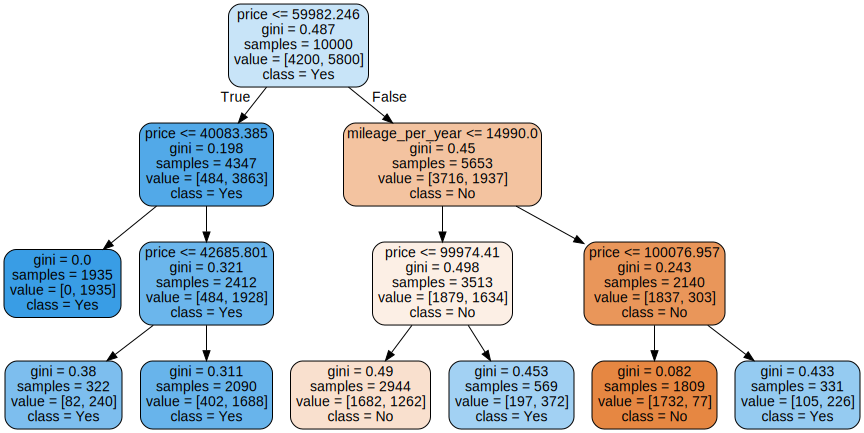

In [ ]:
features=x.columns
dot_data = export_graphviz(search.best_estimator_, out_file=None,
                           filled=True, rounded=True,
                           feature_names = features,
                           class_names =['No', 'Yes'] )

graph = graphviz.Source(dot_data)
graph

Small changes can be seen in this new tree, but now one has more trust in the model and has metrics enough to confirm its results.

All the optimization done here teaches one how to correctly validate a model, compared with the older non-optimized model. Although they were almost equal in terms of score values, one could trust in it and create an even more complex model with the best hyperparameters.

# Optimization based on random exploration

This time an optimization will be based on random hiperparameter optimization. This method allows one to obtain hiperparameters with less computational time and resourses. One will define the goal of this problem's acc, and the search will happen randomly until that acc is achieved

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(SEED)

grid = {
    'max_depth':[3,4,5],
    'min_samples_split':[32,64,128],
    'min_samples_leaf':[32,64,128,192,256],
    'criterion': ['gini', 'entropy'],
}

search = RandomizedSearchCV(DecisionTreeClassifier(), grid,
                            cv=KFold(n_splits=5, shuffle=True),
                            n_iter=22) #chosen empirically
search.fit(x, y)
results = pd.DataFrame(search.cv_results_)
results.head()

scores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))

score_rng_search= scores.mean()*100
print(score_search, score_rng_search)

78.67 78.69


A small improvement was observed, while using less computational resources and time.

There are still other parameters that can be used to optimize the model. This time a bigger grid will be used.

In [ ]:
from scipy.stats import randint

np.random.seed(SEED)

grid = {
    'max_depth': randint(3,10), #n=6
    'min_samples_split': randint(32,129), #n=127
    'min_samples_leaf': randint(32,129), #n=127
    'criterion': ['gini', 'entropy'], #n=2
}
#total grid combinations = 6*127*127*2 = 193548 combinations

search = RandomizedSearchCV(DecisionTreeClassifier(), grid,
                            cv=KFold(n_splits=5, shuffle=True),
                            n_iter=22) #chosen empirically
search.fit(x, y)
results = pd.DataFrame(search.cv_results_)
results.head()

scores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))

score_rng_search= scores.mean()*100
print(score_search, score_rng_search)

78.67 78.71000000000001


An improvement again! Even exploring only 22 points of the 193548 points grid.

In [ ]:
sorted_results = results.sort_values('mean_test_score', ascending=False)
for index, row in sorted_results.iterrows():
  print(f'{row.mean_test_score*100 :.2f}, +-{row.std_test_score*2:.2f}, {row.params}')

78.68, +-0.02, {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 110, 'min_samples_split': 74}
78.26, +-0.02, {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 47, 'min_samples_split': 127}
78.21, +-0.02, {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 102}
78.17, +-0.02, {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 48, 'min_samples_split': 50}
78.16, +-0.02, {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 109, 'min_samples_split': 49}
78.15, +-0.02, {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 107, 'min_samples_split': 90}
78.14, +-0.02, {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 41, 'min_samples_split': 52}
78.11, +-0.02, {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 54, 'min_samples_split': 46}
78.08, +-0.02, {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 107, 'min_samples_split': 40}
78.08, +-0.02, {'criterion': 'entropy', 'max_depth': 6, 'min_sam

Now with a higher value of n_iter one can explore more the grid and see if there is a combination that increases even more the scores.

In [ ]:
np.random.seed(SEED)

grid = {
    'max_depth': randint(3,10), #n=6
    'min_samples_split': randint(32,129), #n=127
    'min_samples_leaf': randint(32,129), #n=127
    'criterion': ['gini', 'entropy'], #n=2
}
#total grid combinations = 6*127*127*2 = 193548 combinations

search = RandomizedSearchCV(DecisionTreeClassifier(), grid,
                            cv=KFold(n_splits=5, shuffle=True),
                            n_iter=100) #increased from 22 to 100
search.fit(x, y)
results = pd.DataFrame(search.cv_results_)
results.head()

scores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))

score_rng_search= scores.mean()*100
print(score_search, score_rng_search)

78.67 78.55


In [ ]:
sorted_results = results.sort_values('mean_test_score', ascending=False)
for index, row in sorted_results.iterrows():
  print(f'{row.mean_test_score*100 :.2f}, +-{row.std_test_score*2:.2f}, {row.params}')

78.68, +-0.01, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 102, 'min_samples_split': 102}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 114}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 108, 'min_samples_split': 110}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 55, 'min_samples_split': 127}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 51, 'min_samples_split': 80}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 72, 'min_samples_split': 43}
78.68, +-0.01, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 90, 'min_samples_split': 118}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 106, 'min_samples_split': 128}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 39, 'min_samples_split': 78}
78.68, +-0.01, {'criterion': 'gini', 'max_depth': 3, 'min_samples_

It has improved again, but again a small improvement, even using 100 combinations.

## Confirming which search was really the best

This comparison is not to be used for all other examples and cases. This is only based on this dataset. Do not accept this result as an alpha and omega truth.

To do this comparison one will be using a random classifier like the RandomForestClassifier, applied with grid and random search, to see if the searchs performs best.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
grid = {
    'max_depth': [3,5], #n=2
    'min_samples_split': [32,64,128], #n=3
    'min_samples_leaf': [32,64,128], #n=3
    'criterion': ['gini', 'entropy'],#n=2
    'n_estimators': [10, 100], #n=2
    'bootstrap': [True, False] #n=2
}
#total grid combinations = 4*3*3*2*2*2 = 288 combinations
time_0=time.time()

search = GridSearchCV(RandomForestClassifier(), grid,
                            cv=KFold(n_splits=5, shuffle=True))
search.fit(x, y)
time_f = time.time()
total_time= time_f-time_0
print(f'The total time was{total_time}')

results = pd.DataFrame(search.cv_results_)
results.head()


The total time was342.06605076789856


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068272,0.003634,0.006396,0.000492,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7675,0.7815,0.7770,0.7735,0.7855,0.7770,0.006245,79
1,0.584671,0.019254,0.032066,0.008222,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7700,0.7810,0.7700,0.7785,0.7755,0.7750,0.004438,120
2,0.060905,0.002187,0.006293,0.001034,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7705,0.7810,0.7730,0.7795,0.7750,0.7758,0.003932,87
3,0.741837,0.101965,0.038440,0.007889,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7705,0.7810,0.7705,0.7795,0.7745,0.7752,0.004400,109
4,0.059782,0.002892,0.005856,0.000561,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7705,0.7915,0.7690,0.7790,0.7740,0.7768,0.008115,83


It took 342 seconds, meaning that the cross validation will take even longer time. Be freee to execute it.

In [ ]:
'''scores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))

score_rng_search= scores.mean()*100
print(score_search, score_rng_search)'''

In [ ]:
np.random.seed(SEED)

grid = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 100],
    'bootstrap': [True, False]
}

time_0=time.time()
search = RandomizedSearchCV(RandomForestClassifier(),grid,
                            cv=KFold(n_splits=5, shuffle=True),
                            n_iter=20)
search.fit(x, y)
results = pd.DataFrame(search.cv_results_)
results.head()

time_f=time.time()

total_time_rng= time_f - time_0
'''
scores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))

score_rng_search= scores.mean()*100'''
#it will take longer than 10 minutes...

'\nscores = cross_val_score(search, x, y, cv =KFold(n_splits=5, shuffle=True))\n\nscore_rng_search= scores.mean()*100'

In [ ]:
print(f'The total time of random search was{total_time_rng}')
print(f'The total time of grid search was{total_time}')

The total time of random search was52.33719182014465
The total time of grid search was342.06605076789856


So random search performed better, considering the time it took. Based on all the other optimizations done, all the results didn't differ that much, and the validation takes too much computational power. There is another way to do optimization and return scores, but being faster than KFold and the others.

This method can't be generalized to all datasets, but for dataset like this, and the condition of low computational power  it can be done.

# Validation with less computacional capacity

Using cross-validation there is no need to separate the data in train and test data. One can use all the data as a training set and predict it. Without cross-validation, it is required to do 3 separations of the data 60% for train, 20% for testing and 20% for validation.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
np.random.seed(SEED)

x_train_test, x_val, y_train_test, y_val = train_test_split(x, y, shuffle=True,
                                                            test_size=0.2, stratify=y)

grid = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 100],
    'bootstrap': [True, False]
}
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
#from the 0.8 train to get 0.2 one needs to use 0.25 test size

time_0=time.time()
search = RandomizedSearchCV(RandomForestClassifier(),grid,
                            cv=KFold(n_splits=5, shuffle=True),
                            n_iter=40)
search.fit(x_train_test, y_train_test)
results = pd.DataFrame(search.cv_results_)
results.head()

time_f=time.time()

total_time_rng= time_f - time_0
print(f'The total time of random search was{total_time}')

In [ ]:
time_0=time.time()
scores = cross_val_score(search, x_val, y_val, cv =split)

time_f=time.time()
total_time= time_f - time_0

print(f'The total time of random search was {total_time:.3f}, and the score was {scores.mean()*100:.3f}')

The total time of random search was 39.493, and the score was 77.600


We lost some of the scores, but that is paid by the time, which was almost 10 times less, compared to the 342 seconds of the random search done earlier.

# Final considerations

The optimization process can be done. Sometimes it results in models that do not increase significantly the validation scores.

There are plenty of ways to ease and make a faster optimization of hyperparameters. Here one explored some of the ways.